In [1]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class LinearReggression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [3]:
weight = 0.7
bias = -1.0

X_data = torch.arange(start=0, end=10, step=0.1).unsqueeze(dim=1)
X_data = X_data[torch.randperm(X_data.size()[0])]
Y_data = weight * X_data + bias

In [4]:
train_ratio = 0.8
train_size = int(X_data.shape[0] * train_ratio)

# Training data
X_train =  X_data[:train_size]
Y_train =  Y_data[:train_size]

# Testing data
X_test =  X_data[train_size:]
Y_test =  Y_data[train_size:]

# Add some noise to training data
Y_train = Y_train + torch.randn(Y_train.shape)

Text(0, 0.5, 'Y')

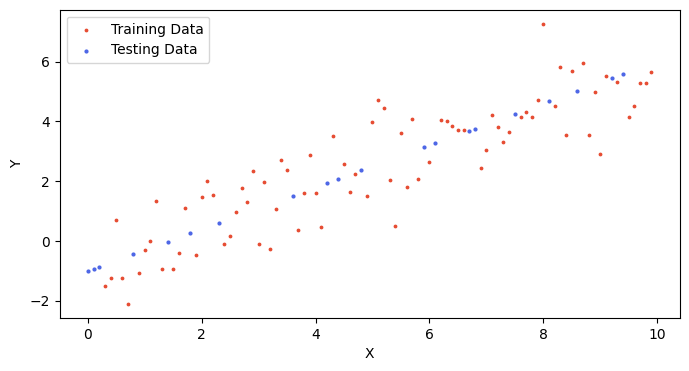

In [5]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, Y_train, s=3, color=(0.9, 0.3, 0.2), label= 'Training Data')
plt.scatter(X_test, Y_test, s=4, color=(0.3, 0.4, 0.9), label='Testing Data')
plt.legend(); plt.xlabel('X'); plt.ylabel('Y')

In [6]:
# Create a model
model_1 = LinearReggression()
model_1.state_dict()

# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_1.to('cuda')
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
print(device)

# Set Hyper Params
LEARNING_RATE = 0.04
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=LEARNING_RATE)

cuda


In [7]:
EPOCHS = 300
# Loss values
train_loss_values = torch.empty(size=(EPOCHS, 1))

for epoch in range(EPOCHS):
    model_1.train()
    # Zero grad
    optimizer.zero_grad()

    # Make predictions
    Y_train_preds = model_1.forward(X_train)

    # Calcualte the loss
    train_loss = loss_func(Y_train_preds, Y_train)
    train_loss_values[epoch] = (train_loss.detach())

    # Calculate gradients
    train_loss.backward()

    # Step the params
    optimizer.step()

print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6688]], device='cuda:0')), ('linear_layer.bias', tensor([-0.9585], device='cuda:0'))])


Text(0, 0.5, 'Training loss')

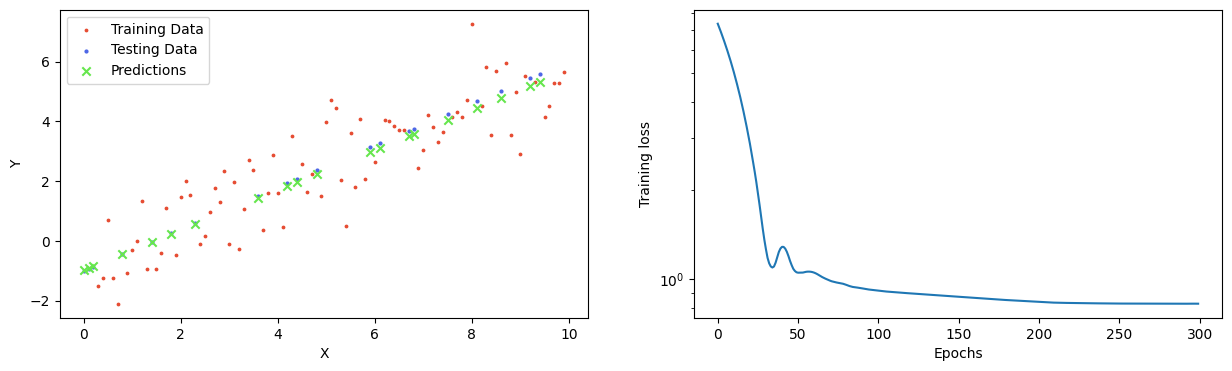

In [8]:
with torch.inference_mode():
    Y_test_preds = model_1(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4))

ax1.scatter(X_train.cpu(), Y_train.cpu(), s=3, color=(0.9, 0.3, 0.2), label= 'Training Data')
ax1.scatter(X_test.cpu(), Y_test.cpu(), s=4, color=(0.3, 0.4, 0.9), label='Testing Data')
ax1.scatter(X_test.cpu(), Y_test_preds.cpu(), marker='x', color=(0.4, 0.9, 0.3), label= 'Predictions')
ax1.legend(); ax1.set_xlabel('X'); ax1.set_ylabel('Y')

ax2.plot(range(EPOCHS), train_loss_values.cpu())
ax2.set_yscale("log")
ax2.set_xlabel('Epochs'); ax2.set_ylabel('Training loss')

In [10]:
# Save the model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_linear.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)